## Import Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Read CSV

In [50]:
df = pd.read_csv("allyear.csv")
df2 = df.corr().abs()

In [51]:
df3 = df2[df2['POP_SNAP'] > 0.6]

In [52]:
df3

,population,unemploymentRate,povertyRate,medianIncome,avgmealmon,homeless,pplweekmon,drivealone,carpooled,publicTrans,walked,meanHouseIncome,yeshealth,privatehealth,publichealth,nohealth,POP_SNAP
population,1.000000,0.263586,0.090570,0.084500,0.019133,0.591383,0.050700,0.945830,0.942731,0.674527,0.686380,0.224894,0.998130,0.975020,0.940448,0.861809,0.660805
povertyRate,0.090570,0.500398,1.000000,0.848366,0.287375,0.384512,0.690082,0.112686,0.162925,0.318465,0.401652,0.749107,0.047779,0.089406,0.310709,0.415315,0.674003
homeless,0.591383,0.025236,0.384512,0.266453,0.108051,1.000000,0.453408,0.449822,0.523188,0.569306,0.581056,0.064108,0.562882,0.473726,0.670776,0.684638,0.746321
carpooled,0.942731,0.263877,0.162925,0.041811,0.113825,0.523188,0.085880,0.892804,1.000000,0.613113,0.664018,0.160592,0.938223,0.910184,0.885444,0.839203,0.674770
publicTrans,0.674527,0.138395,0.318465,0.091909,0.026737,0.569306,0.165905,0.422139,0.613113,1.000000,0.947683,0.068612,0.645294,0.573866,0.652674,0.831374,0.679789
walked,0.686380,0.087871,0.401652,0.164310,0.060991,0.581056,0.190965,0.438373,0.664018,0.947683,1.000000,0.001881,0.654390,0.570985,0.692385,0.876404,0.755258
yeshealth,0.998130,0.279376,0.047779,0.118544,0.017426,0.562882,0.083486,0.959275,0.938223,0.645294,0.654390,0.250363,1.000000,0.985432,0.929147,0.830742,0.623689
publichealth,0.940448,0.146743,0.310709,0.157232,0.065868,0.670776,0.128149,0.844619,0.885444,0.652674,0.692385,0.006497,0.929147,0.858666,1.000000,0.878965,0.816768
nohealth,0.861809,0.078733,0.415315,0.193366,0.028130,0.684638,0.211323,0.684538,0.839203,0.831374,0.876404,0.007616,0.830742,0.743158,0.878965,1.000000,0.864358
POP_SNAP,0.660805,0.096361,0.674003,0.475714,0.138293,0.746321,0.443268,0.463006,0.674770,0.679789,0.755258,0.318795,0.623689,0.489266,0.816768,0.864358,1.000000


## SNAP Cutoff

In [53]:
drop1 = ['unemploymentRate', 'medianIncome', 'avgmealmon', 'pplweekmon', 'drivealone', 'meanHouseIncome', 'privatehealth']
df3.drop(drop1, axis=1, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
df3

,population,povertyRate,homeless,carpooled,publicTrans,walked,yeshealth,publichealth,nohealth,POP_SNAP
population,1.000000,0.090570,0.591383,0.942731,0.674527,0.686380,0.998130,0.940448,0.861809,0.660805
povertyRate,0.090570,1.000000,0.384512,0.162925,0.318465,0.401652,0.047779,0.310709,0.415315,0.674003
homeless,0.591383,0.384512,1.000000,0.523188,0.569306,0.581056,0.562882,0.670776,0.684638,0.746321
carpooled,0.942731,0.162925,0.523188,1.000000,0.613113,0.664018,0.938223,0.885444,0.839203,0.674770
publicTrans,0.674527,0.318465,0.569306,0.613113,1.000000,0.947683,0.645294,0.652674,0.831374,0.679789
walked,0.686380,0.401652,0.581056,0.664018,0.947683,1.000000,0.654390,0.692385,0.876404,0.755258
yeshealth,0.998130,0.047779,0.562882,0.938223,0.645294,0.654390,1.000000,0.929147,0.830742,0.623689
publichealth,0.940448,0.310709,0.670776,0.885444,0.652674,0.692385,0.929147,1.000000,0.878965,0.816768
nohealth,0.861809,0.415315,0.684638,0.839203,0.831374,0.876404,0.830742,0.878965,1.000000,0.864358
POP_SNAP,0.660805,0.674003,0.746321,0.674770,0.679789,0.755258,0.623689,0.816768,0.864358,1.000000


## Variable Cutoff

In [55]:
upper = df3.where(np.triu(np.ones(df3.shape), k=1).astype(bool))

# Find features with correlation greater than 0.67
to_drop = [column for column in upper.columns if any(upper[column] > 0.67)]

# Drop features 
df3.drop(to_drop, axis=1, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
df3

,population,povertyRate,homeless
population,1.000000,0.090570,0.591383
povertyRate,0.090570,1.000000,0.384512
homeless,0.591383,0.384512,1.000000
carpooled,0.942731,0.162925,0.523188
publicTrans,0.674527,0.318465,0.569306
walked,0.686380,0.401652,0.581056
yeshealth,0.998130,0.047779,0.562882
publichealth,0.940448,0.310709,0.670776
nohealth,0.861809,0.415315,0.684638
POP_SNAP,0.660805,0.674003,0.746321


In [57]:
drop3 = ['carpooled', 'publicTrans', 'walked', 'yeshealth', 'publichealth', 'nohealth', 'POP_SNAP']
df3.drop(drop3, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
df3

,population,povertyRate,homeless
population,1.000000,0.090570,0.591383
povertyRate,0.090570,1.000000,0.384512
homeless,0.591383,0.384512,1.000000


In [59]:
opvars = ['population', 'povertyRate', 'homeless', 'POP_SNAP']
df = df[opvars]
df

,population,povertyRate,homeless,POP_SNAP
0,263670,0.111,357,32072
1,932202,0.056,271,30301
2,445349,0.055,518,19123
3,506471,0.107,603,59120
4,92039,0.088,90,6712
...,...,...,...,...
100,63732,0.114,38,9325
101,329626,0.052,342,12874
102,143004,0.048,57,4735
103,549905,0.106,504,49795


In [60]:
df.to_csv('method1A.csv')

In [61]:
df.cov()

,population,povertyRate,homeless,POP_SNAP
population,6.581904e+10,945.568793,6.543579e+07,5.595003e+09
povertyRate,9.455688e+02,0.001656,6.748580e+00,9.052007e+02
homeless,6.543579e+07,6.748580,1.860120e+05,1.062300e+07
POP_SNAP,5.595003e+09,905.200724,1.062300e+07,1.089187e+09


In [62]:
df.var()

population     6.581904e+10
povertyRate    1.656014e-03
homeless       1.860120e+05
POP_SNAP       1.089187e+09
dtype: float64

# Multiple Linear Regression

In [63]:
df = pd.read_csv("method1A.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [64]:
df

,population,povertyRate,homeless,POP_SNAP
0,263670,0.111,357,32072
1,932202,0.056,271,30301
2,445349,0.055,518,19123
3,506471,0.107,603,59120
4,92039,0.088,90,6712
...,...,...,...,...
100,63732,0.114,38,9325
101,329626,0.052,342,12874
102,143004,0.048,57,4735
103,549905,0.106,504,49795


In [65]:
x = df.drop(['POP_SNAP'],axis=1).values
y = df['POP_SNAP'].values

In [66]:
# splitting dataset into training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [67]:
# training model on training set
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [68]:
# predict test set results
y_pred=ml.predict(x_test)
print(y_pred)

[ 38376.90525146  44792.99087002  22976.68626934    447.64556331
  54912.16473529 124025.9444777   20498.03595262  16289.30891023
  47641.80824181  54252.62957071  58485.21982533  20284.06047031
 -12104.21388395  22918.05829023  14673.31142913  -6826.08264959
  54701.96981689  62869.2251648   34353.49505831  82245.6006064
  53154.11261539  58812.57178556  51781.63954408  58175.09465931
  52132.9851186   36043.99426891 119016.14165357  51848.13932981
  52665.79404874  24821.90936396  51374.41563045  57520.16577526]


In [69]:
#ml.predict([[4.875000,3.43,100267]])

Text(0.5, 1.0, 'Method 1A')

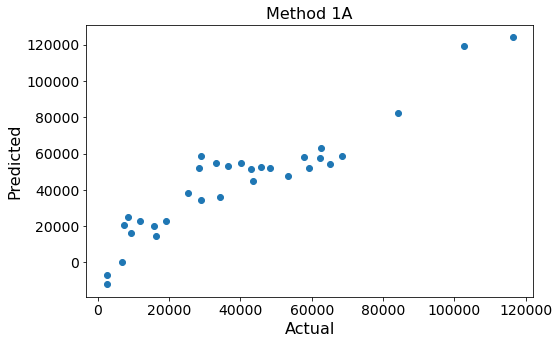

In [70]:
# scatterplot of results
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Predicted', fontsize=16)
plt.title('Method 1A', fontsize=16)

In [71]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,25400,38376.905251,-12976.905251
1,43657,44792.990870,-1135.990870
2,19123,22976.686269,-3853.686269
3,6672,447.645563,6224.354437
4,40208,54912.164735,-14704.164735
5,116345,124025.944478,-7680.944478
6,7269,20498.035953,-13229.035953
7,9325,16289.308910,-6964.308910
8,53298,47641.808242,5656.191758
9,65177,54252.629571,10924.370429


In [72]:
# define our intput
X2 = sm.add_constant(x)

# create a OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           8.20e-43
Time:                        15:25:07   Log-Likelihood:                -1138.1
No. Observations:                 105   AIC:                             2284.
Df Residuals:                     101   BIC:                             2295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.784e+04   3857.192     -9.810      0.0